数据来源CDNow网站的用户购买明细。一共有用户ID，购买日期，购买数量，购买金额四个字段。我们通过案例数据完成一份基础的数据分析报告。

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')#自带的美化方式

In [2]:
columns = ['user_id','order_dt','order_products','order_amount']
df = pd.read_table('F:/数据分析项目及其代码/CDNOW_master.txt',names = columns,sep='\s+',engine ='python')

In [3]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [6]:
df['order_date'] = pd.to_datetime(df.order_dt,format='%Y%m%d')

In [7]:
df['month'] = df.order_date.values.astype('datetime64[M]')#在pandas中提取日期时间类型列的第一天,把时间保留到月

(1）df[‘order_data’]的作用是在df中添加一列名为order_data的数据 
（2）pd.to_datetime将字符串或者数字转换成时间格式，format是转换后的格式。例如19970101，%Y匹配前四位数字1997，如果y小写只匹配两位数字97，%m匹配01，%d匹配01。另外，小时是%h，分钟是%M，注意和月的大小写不一致，秒是%s。若是1997-01-01这形式，则是%Y-%m-%d，以此类推。 
（3）astype(‘datetime64[M]’)保留到月份 

In [8]:
df.head()

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
order_date        69659 non-null datetime64[ns]
month             69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.2 MB


In [10]:
user_grouped = df.groupby('user_id').sum()
user_grouped.head(10)

,order_dt,order_products,order_amount
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61
6,19970101,1,20.99
7,59921434,18,264.67
8,159775420,18,197.66
9,59921222,6,95.85


In [11]:
user_grouped.describe()

,order_dt,order_products,order_amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


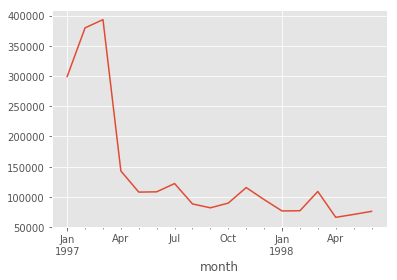

In [12]:
df.groupby('month').order_amount.sum().plot()

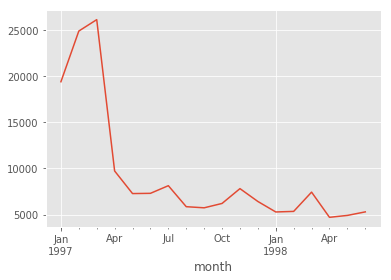

In [13]:
df.groupby('month').order_products.sum().plot()

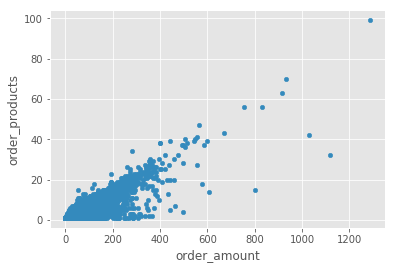

In [14]:
df.plot.scatter(x = 'order_amount',y = 'order_products')

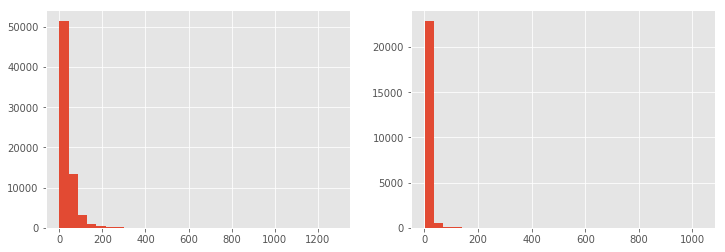

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(121)
df.order_amount.hist(bins = 30)

plt.subplot(122)
df.groupby('user_id').order_products.sum().hist(bins = 30)

In [16]:
df.groupby('user_id').month.min().value_counts()


1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

可以看出用户首次消费集中在前三个月，也就是说前三个月有大量的新用户 

In [17]:
df.groupby('user_id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

In [18]:
pivoted_counts = df.pivot_table(index = 'user_id',columns = 'month',
                               values = 'order_dt',aggfunc = 'count').fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_counts.columns = columns_month
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
pivoted_counts_transf = pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x == 0 else 0)
pivoted_counts_transf.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


（a）applymap:作用于数组中每一个元素 
（b）lambda表达式用法很多，可以详细看这里 
（3）复购率及可视化

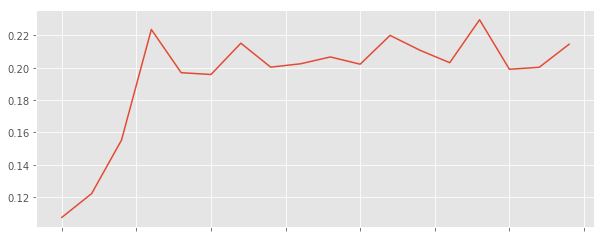

In [20]:
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize = (10,4))

In [21]:
pivoted_amount = df.pivot_table(index = 'user_id',columns = 'month',
                               values = 'order_amount',aggfunc = 'mean').fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_amount.columns = columns_month
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [22]:
pivoted_purchase= pivoted_amount.applymap(lambda x:1 if x > 0 else 0)#转换数据格式，方便计算
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [23]:
def purchase_return(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status

pivoted_purchase_return = pivoted_purchase.apply(purchase_return, axis=1)#转换格式
pivoted_purchase_return.head(5)

user_id
1    [0, nan, nan, nan, nan, nan, nan, nan, nan, na...
2    [0, nan, nan, nan, nan, nan, nan, nan, nan, na...
3    [0, nan, 1, 0, nan, nan, nan, nan, nan, nan, 0...
4    [0, nan, nan, nan, nan, nan, nan, 0, nan, nan,...
5    [1, 0, nan, 1, 1, 1, 0, nan, 0, nan, nan, 1, 0...
dtype: object

%%(pivoted_purchase_return.sum() / pivoted_purchase_return.count()).plot(figsize = (10,4)) #回购率

In [24]:
def active_status(data):
    status = []
    for i in range(18):
        if data[i] == 0: #没有消费
            if len(status) > 0: #不是第一个月
                if status[i - 1] == 'unreg':#前一个月还不是新用户
                    status.append('unreg')#仍然不是新用户
                else:
                    status.append('unactive')
            else: 
                status.append('unreg') #还不是新用户
        else:
            if len(status) == 0: #第一个月
                status.append('new')#新用户
            else:
                if status[i - 1] == 'unactive': #上一个月不活跃
                    status.append('return') #回流用户
                elif status[i - 1] == 'unreg': #上一个月不是新用户
                    status.append('new') #新用户
                else:
                    status.append('active') #活跃用户
    return status
def user_stratification(df):
    pivoted_purchase = return_purchase_ratio(df)
    pivoted_purchase_status = pivoted_purchase.apply(lambda x: active_status(x), axis=1)
    purchase_status_counts = pivoted_purchase_status.replace('unreg', np.NaN).apply(lambda x: pd.value_counts(x))
    purchase_status_counts.fillna(0).T.plot.area(figsize=(12, 6))  #面积图

In [25]:
return_rata = purchase_status_counts.apply(lambda x:x / x.sum(),axis = 1)
    plt.figure()
    plt.subplot(121) #1*2个图片区域占用第一个 
    return_rata.loc['return'].plot(figsize = (12,6)) #回流用户占比
    plt.subplot(122) #1*2个图片区域占用第二个
    return_rata.loc['active'].plot(figsize = (12,6)) #活跃用户占比
    plt.show()

IndentationError: unexpected indent (<ipython-input-25-0a689dd03c55>, line 2)

In [26]:
def user_quality(df):
    user_amount = df.groupby('user_id').order_amount.sum().sort_values().reset_index()  # 升序并保留原行索引
    user_amount['amount_cumsum'] = user_amount.order_amount.cumsum()  # 累加
    amount_total = user_amount.amount_cumsum.max()
    user_amount['prop'] = user_amount.apply(lambda x: x.amount_cumsum / amount_total, axis=1) #转换成百分比
    print(user_amount.tail()) #输出后5行
    user_amount.prop.plot() #可视化（用户数和贡献金额的关系）

In [ ]:
user_counts = df.groupby('user_id').order_dt.count().sort_values().reset_index()
    user_counts['counts_cumsum'] = user_counts.order_dt.cumsum()
    counts_total = user_counts.counts_cumsum.max()
    user_counts['prop'] = user_counts.apply(lambda x:x.counts_cumsum / counts_total, axis = 1)
    print(user_counts.tail())
    user_counts.prop.plot() #可视化（用户数和购买数量的关系）
    plt.show()

In [ ]:
def user_lifetime(df):
    user_purchase = df[['user_id', 'order_products', 'order_amount', 'order_date']]
    order_data_min = user_purchase.groupby('user_id').order_date.min()
    order_data_max = user_purchase.groupby('user_id').order_date.max()
    order_data_interval = order_data_max - order_data_min
    print(order_data_interval.head(10))

In [ ]:
(order_data_interval / np.timedelta64(1, 'D')).hist(bins = 15) #去掉days并做直方图(生命周期与用户数)

In [ ]:
order_data_interval_mean = order_data_interval.mean() #最大时间间隔平均值（用户的平均生命周期）

In [ ]:
life_time = (order_data_interval).reset_index() #生命周期并保留原用户ID
    life_time['life_time'] = life_time.order_date / np.timedelta64(1, 'D')
    life_time[life_time.life_time > 0].life_time.hist(bins = 100,figsize = (12,6)) #用户（生命周期大于0）与生命周期的关系
    plt.show()

In [ ]:
life_time_mean = life_time[life_time.life_time > 0].life_time.mean()#用户（生命周期大于0）平均生命周期
    print(life_time_mean)

In [ ]:
def user_retention(df):
    user_purchase = df[['user_id', 'order_products', 'order_amount', 'order_date']]
    order_data_min = user_purchase.groupby('user_id').order_date.min()
    user_purchase_retention = pd.merge(left=user_purchase, right=order_data_min.reset_index(),
                                       how='inner', on='user_id',
                                       suffixes=('', '_min')) #合并两张表格
    user_purchase_retention['order_date_diff'] = user_purchase_retention.order_date - user_purchase_retention.order_date_min#每一次消费距离第一次消费的时间差
    print(user_purchase_retention.head(5))

In [ ]:
date_trans = lambda x: x / np.timedelta64(1, 'D')
    user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(date_trans)#时间差去掉days转化成数字
    bin = [0, 3, 7, 15, 30, 60, 90, 180, 365] #自定义时间间隔
    user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff, bins=bin) #将时间差值分桶

In [ ]:
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x: 1 if x > 0 else 0)#转换数据格式，方便计算
    retention = pivoted_retention_trans.sum()/ pivoted_retention_trans.count()#留存率
    retention.plot.bar()
    plt.show()

In [ ]:
def purchase_lifetime_mean(df):
    user_purchase_retention = user_retention(df)
    def diff(group):
        d = group.date_diff - group.date_diff.shift(-1)
        return d
    last_diff = user_purchase_retention.groupby('user_id').apply(diff)
    print(last_diff.mean())
    last_diff.hist(bins=20)
    plt.show()